<a href="https://colab.research.google.com/github/savindumahasen/Brain-Tumor-Classification/blob/main/BrainTumorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q
!pip install opendatasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 120.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.3 MB/s eta 0:00:00


In [2]:
## import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: savinduruhunuhewa
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset


100%|██████████| 149M/149M [00:00<00:00, 1.21GB/s]

In [7]:
## define the batch size and image size
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

In [11]:
## Define the train and tes set director path
train_dir="/content/brain-tumor-mri-dataset/Training"
test_dir="/content/brain-tumor-mri-dataset/Testing"

In [9]:
## split the train set into train set and  validation set

## define the batch size and image size
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

## Define the train and tes set director path
train_dir="/content/brain-tumor-mri-dataset/Training"
test_dir="/content/brain-tumor-mri-dataset/Testing"

train_set=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMAGE_SIZE,
                                                      subset='training',
                                                      validation_split=0.1,
                                                      seed=42)
validation_set=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMAGE_SIZE,
                                                           subset='validation',
                                                           validation_split=0.1,
                                                           seed=42
                                                           )

Found 5712 files belonging to 4 classes.
Using 5141 files for training.
Found 5712 files belonging to 4 classes.
Using 571 files for validation.


In [23]:
## Load the test set

test_set=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMAGE_SIZE,
                                                           )

Found 5712 files belonging to 4 classes.


In [13]:
## Get the target values

In [14]:
class_names=train_set.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [17]:
## Look at the one batch

In [16]:
for image_size, label_batch in train_set.take(1):
  print(image_size.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


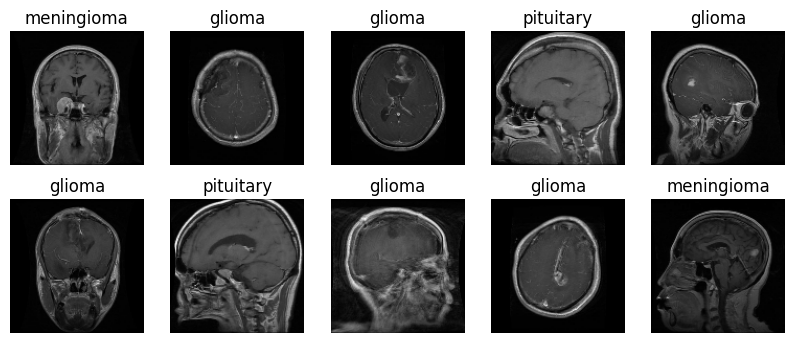

In [20]:
## Plot the data sample
plt.figure(figsize=(10,4))
for image,label in train_set.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [22]:
for image,label in train_set.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[1.   1.   1.  ]
   [1.   1.   1.  ]
   [1.   1.   1.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[3.   3.   3.  ]
   [3.   3.   3.  ]
   [3.   3.   3.  ]
   ...
   [0.   0.   0.  ]
   [1.   1.   1.  ]
   [1.   1.   1.  ]]

  ...

  [[3.   3.   3.  ]
   [3.   3.   3.  ]
   [1.5  1.5  1.5 ]
   ...
   [2.   2.   2.  ]
   [1.   1.   1.  ]
   [1.   1.   1.  ]]

  [[1.   1.   1.  ]
   [1.   1.   1.  ]
   [1.   1.   1.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]]


 [[[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0

In [24]:
train_data=train_set.map(lambda x,y:(x/255,y))
validation_data=validation_set.map(lambda x,y:(x/255,y))
test_data=test_set.map(lambda x,y:(x/255,y))